## ResNet50 model

Experiment with a baseline ResNet50 deep learning model pretrained with imagenet. ResNet50 is a Residual Network with 50 pretrained layers.


In [1]:
!pip install google_images_download

In [6]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "person", "limit": 5, "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = person
Evaluating...
Starting Download...
Image URL: https://content.api.news/v3/images/bin/a6923adbc7bece73803221613f410782
Invalid or missing image format. Skipping...
Image URL: https://cdn.psychologytoday.com/sites/default/files/styles/article-inline-half-caption/public/field_blog_entry_images/2018-09/shutterstock_648907024.jpg?itok=0hb44OrI
Completed Image ====> 1.shutterstock_648907024.jpg
Image URL: https://image.cnbcfm.com/api/v1/image/106069136-1565284193572gettyimages-1142580869.jpeg?v=1576531407&w=1400&h=950
Completed Image ====> 2.106069136-1565284193572gettyimages-1142580869.jpeg
Image URL: https://api.time.com/wp-content/uploads/2017/12/terry-crews-person-of-year-2017-time-magazine-2.jpg
Completed Image ====> 3.terry-crews-person-of-year-2017-time-magazine-2.jpg
Image URL: https://img.buzzfeed.com/buzzfeed-static/static/2019-11/8/20/campaign_images/233a50525782/trumps-allies-have-been-attacking-the-person-they-2-1901-1573245212-0_dblbig.jpg
Co

In [7]:
absolute_image_paths

({'person': ['/content/downloads/person/1.shutterstock_648907024.jpg',
   '/content/downloads/person/2.106069136-1565284193572gettyimages-1142580869.jpeg',
   '/content/downloads/person/3.terry-crews-person-of-year-2017-time-magazine-2.jpg',
   '/content/downloads/person/4.trumps-allies-have-been-attacking-the-person-they-2-1901-1573245212-0_dblbig.jpg',
   '/content/downloads/person/5.billgates.jpg']},
 1)

In [8]:
import numpy as np
import re
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions
resnet = ResNet50(weights='imagenet')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

def img_pred(img_path):
  img = process_img_path(img_path)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  model = resnet
  features = model.predict(x)
  results = decode_predictions(features, top=3)[0]
    
  objects = [entry[1] for entry in results]
  y_pos = np.arange(len(objects))
  performance = [entry[2] for entry in results]

  fig, ax = plt.subplots()

  plt.bar(y_pos, performance, align='center', alpha=0.9, color='yellow')
  plt.xticks(y_pos, objects)
  plt.ylabel("Prediction")
  plt.xlabel("Other objects")
  plt.show()


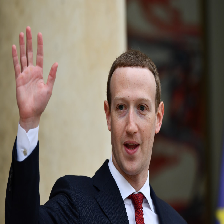

In [10]:
process_img_path(absolute_image_paths[0]['person'][1])

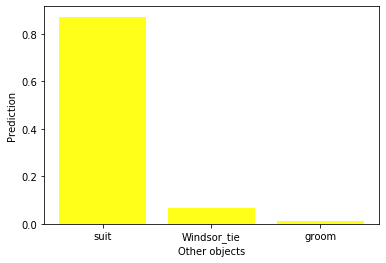

In [11]:
img_pred(absolute_image_paths[0]['person'][1])